In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [150]:
#апрувни через первую лабу csv файл из final.py
df = pd.read_csv("processed_dataset.csv")
print("Первые 5 строк обработанного датасета:")
df.head()

Первые 5 строк обработанного датасета:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,True,False
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,True,False,False,False,False,True,False
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,False,True,False,False,False,True,True
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,False,True,False,False,False,True,False
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,True,False,False,False,False,True,False


In [151]:
#классификация целевого признака – "Transported" если он имеет тип bool, приведём к целочисленному виду (0 и 1)
if df["Transported"].dtype == bool:
    df["Transported"] = df["Transported"].astype(int)

In [152]:
# формирование переменных
X_cls = df.drop(columns=["Transported"])  # удаляем только целевой столбец
y_cls = df["Transported"]

In [153]:
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(
    X_cls, y_cls, test_size=0.3, random_state=42, stratify=y_cls
)

In [162]:
#модель случайного леса
classifier = DecisionTreeClassifier()
classifier.fit(X_cls_train, y_cls_train)

DecisionTreeClassifier()

In [155]:
#предсказывание классов
y_cls_pred = classifier.predict(X_cls_test)
accuracy = accuracy_score(y_cls_test, y_cls_pred)

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay

In [157]:
print("=== Задача классификации (предсказание Transported) ===")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred))

=== Задача классификации (предсказание Transported) ===
Accuracy: 0.7385
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1295
           1       0.72      0.78      0.75      1313

    accuracy                           0.74      2608
   macro avg       0.74      0.74      0.74      2608
weighted avg       0.74      0.74      0.74      2608



In [158]:
y_prob = classifier.predict_proba(X_cls_test)[:, 1]

In [159]:
#вычисляем ROC-кривую и AUC
fpr, tpr, thresholds = roc_curve(y_cls_test, y_prob)
roc_auc = auc(fpr, tpr)

In [160]:
print("=== Задача классификации (предсказание Transported) ===")
print(f"ROC AUC: {roc_auc:.4f}\n")

=== Задача классификации (предсказание Transported) ===
ROC AUC: 0.7579



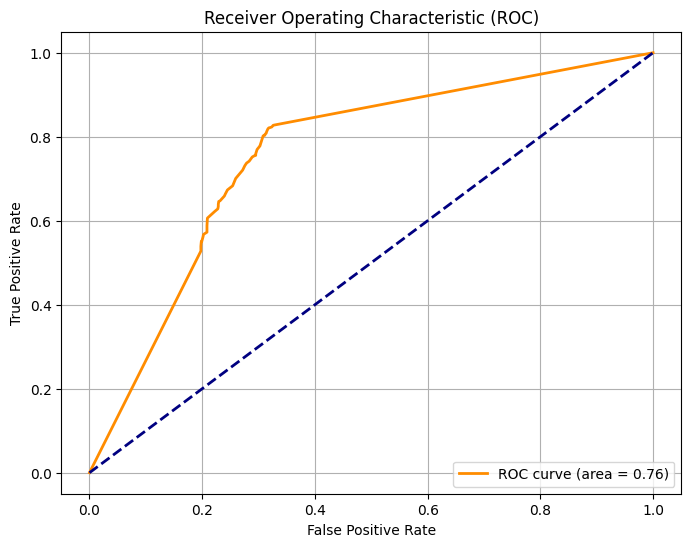

In [161]:
#построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
